# CA5 Phase2

### The purpose of this project is to create a Neural Network with TensorFlow and Keras library and Train it with given dataset and then test it with given test dataset

# Imports

In [28]:
import os
import random
import tensorboard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.utils import *
from sklearn.metrics import classification_report

# Body

# Part 1: Data Analysis and Preprocess¶

In [29]:
train_path = "../dataset/train"

In [30]:
img_path = []
labels = []
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    for img in os.listdir(folder_path):
        img_path.append(os.path.join(folder_path, img))
        labels.append(folder)

In [31]:
df = pd.DataFrame({
    "image" : img_path,
    "label" : labels
})

In [32]:
df.count()

image    1953
label    1953
dtype: int64

In [33]:
df['label'].value_counts().count()

4

In [34]:
df['label'].value_counts()

bald_eagle    523
racoon        509
elk           462
raven         459
Name: label, dtype: int64

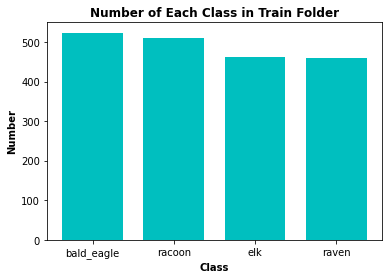

In [35]:
plt.bar(
    df['label'].value_counts().keys(),
    df['label'].value_counts().values,
    color='c',
    width=.75
)
plt.xlabel("Class", fontweight ='bold')
plt.ylabel("Number", fontweight ='bold')
plt.title("Number of Each Class in Train Folder", fontweight ='bold')
plt.show()

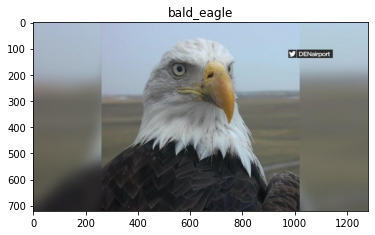

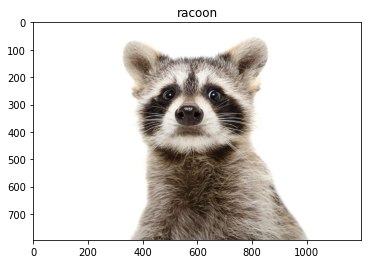

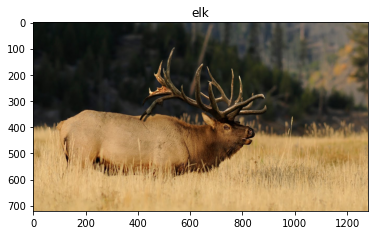

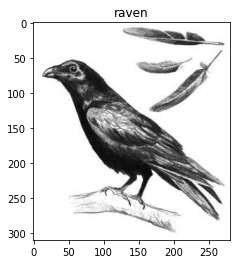

In [36]:
for name in df['label'].value_counts().keys():
    rand_num = random.randint(0, len(df))
    while df['label'][rand_num] != name:
        rand_num = random.randint(0, len(df))
    img = load_img(df['image'][rand_num])
    title = df['label'][rand_num]
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [37]:
classes_labels = {
    df['label'].value_counts().keys()[i] : i for i in range(0, df['label'].value_counts().count())
}

In [38]:
classes_labels

{'bald_eagle': 0, 'racoon': 1, 'elk': 2, 'raven': 3}

In [39]:
df['label']

0       bald_eagle
1       bald_eagle
2       bald_eagle
3       bald_eagle
4       bald_eagle
           ...    
1948        racoon
1949        racoon
1950        racoon
1951        racoon
1952        racoon
Name: label, Length: 1953, dtype: object

In [40]:
for i in range(len(df)):
    df['label'][i] = classes_labels[df['label'][i]]

In [41]:
df['label']

0       0
1       0
2       0
3       0
4       0
       ..
1948    1
1949    1
1950    1
1951    1
1952    1
Name: label, Length: 1953, dtype: object

In [42]:
one_hot = [str(to_categorical(i, df['label'].value_counts().count())) for i in df['label']]

In [43]:
df['label'] = one_hot

In [44]:
df['label']

0       [1. 0. 0. 0.]
1       [1. 0. 0. 0.]
2       [1. 0. 0. 0.]
3       [1. 0. 0. 0.]
4       [1. 0. 0. 0.]
            ...      
1948    [0. 1. 0. 0.]
1949    [0. 1. 0. 0.]
1950    [0. 1. 0. 0.]
1951    [0. 1. 0. 0.]
1952    [0. 1. 0. 0.]
Name: label, Length: 1953, dtype: object

### As seen above, labels are one hot encoded

### We dont have an order or rank in our classes, but, when label encoding is performed, the class names are ranked. Due to this, there is a very high probability that the model captures the relationship between classes based on their ranks. So, we use One Hot Encoding to solve this problem.

In [45]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255.0,
    validation_split = 0.25,
)

### Shuffle dataframe befor dividing to Train and Validation:

In [46]:
df = df.sample(frac = 1)

In [47]:
df

image          label
782       ../dataset/train/raven/9b5647442c6609aadc.jpg  [0. 0. 0. 1.]
1563     ../dataset/train/racoon/94f4a55c53e0c87d75.jpg  [0. 1. 0. 0.]
1116        ../dataset/train/elk/f48c4df3e3e8d1ac62.jpg  [0. 0. 1. 0.]
1573     ../dataset/train/racoon/cbc0caef3e4180b471.jpg  [0. 1. 0. 0.]
1897     ../dataset/train/racoon/664876adcb93f05a9f.jpg  [0. 1. 0. 0.]
...                                                 ...            ...
147   ../dataset/train/bald_eagle/810258a8327f366972...  [1. 0. 0. 0.]
867       ../dataset/train/raven/d1d71923663c83b1c8.jpg  [0. 0. 0. 1.]
379   ../dataset/train/bald_eagle/ae17098e5c7ba694ed...  [1. 0. 0. 0.]
1045        ../dataset/train/elk/5affc564162ef4b10b.jpg  [0. 0. 1. 0.]
526       ../dataset/train/raven/8ba35c2203a75cde60.jpg  [0. 0. 0. 1.]

[1953 rows x 2 columns]

In [48]:
TrainData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'label',
    target_size = (128, 128),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = False,
    validate_filenames = False
)   

Found 1465 non-validated image filenames belonging to 4 classes.


In [49]:
ValidationData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'label',
    target_size = (128, 128),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = False,
    validate_filenames = False
)

Found 488 non-validated image filenames belonging to 4 classes.


# Part 2: Make Neural Network

In [50]:
inpt = layers.Input(shape=(128, 128, 1))

output = layers.Flatten()(inpt)
output = layers.Dense(1024, activation = "relu")(output)
output = layers.Dense(512, activation = "relu")(output)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)

In [51]:
model = models.Model(inputs = inpt, outputs = output)

In [52]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [53]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              16778240  
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 17,435,396
Trainable params: 17,435,396
Non-t

### The number of parameters is equal to the product of the number of nodes in two consecutive layers.

# Part 3: Data Classification

In [54]:
history = model.fit(TrainData, validation_data = ValidationData, epochs=15)

Epoch 1/15
 3/46 [>.............................] - ETA: 13s - loss: 1.6024 - accuracy: 0.3125

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 18s 387ms/step - loss: 1.3669 - accuracy: 0.3529 - val_loss: 1.3703 - val_accuracy: 0.3402
Epoch 2/15
46/46 [==============================] - 17s 371ms/step - loss: 1.2373 - accuracy: 0.4423 - val_loss: 1.2359 - val_accuracy: 0.4180
Epoch 3/15
46/46 [==============================] - 16s 354ms/step - loss: 1.1945 - accuracy: 0.4669 - val_loss: 1.1569 - val_accuracy: 0.4980
Epoch 4/15
46/46 [==============================] - 17s 368ms/step - loss: 1.1271 - accuracy: 0.4942 - val_loss: 1.1346 - val_accuracy: 0.5615
Epoch 5/15
46/46 [==============================] - 17s 378ms/step - loss: 1.0799 - accuracy: 0.5338 - val_loss: 1.1152 - val_accuracy: 0.5246
Epoch 6/15
46/46 [==============================] - 17s 370ms/step - loss: 1.0541 - accuracy: 0.5427 - val_loss: 1.1924 - val_accuracy: 0.4426
Epoch 7/15
46/46 [==============================] - 17s 374ms/step - loss: 1.0024 - accuracy: 0.5802 - val_loss: 1.0287 - val_accuracy: 0.5840
Epoch 8/15

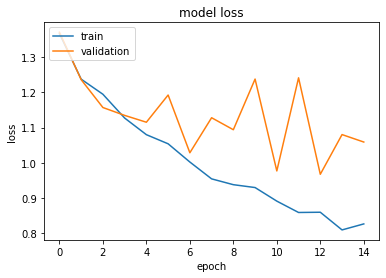

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

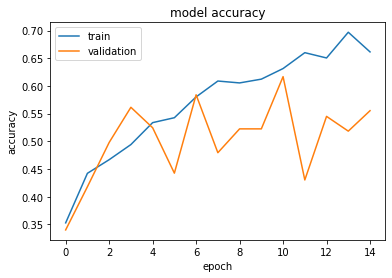

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [57]:
y_pred = model.predict(TrainData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

46/46 [==============================] - 12s 267ms/step


In [58]:
y_pred

array([[0.60478586, 0.02095544, 0.18702734, 0.18723132],
       [0.00701132, 0.01223822, 0.13029899, 0.8504514 ],
       [0.07892513, 0.07490325, 0.78316903, 0.06300268],
       ...,
       [0.13052201, 0.25222442, 0.4414409 , 0.1758127 ],
       [0.02126547, 0.5225643 , 0.44746765, 0.00870262],
       [0.26426035, 0.20491996, 0.3594339 , 0.17138588]], dtype=float32)

In [59]:
y_pred_bool

array([0, 3, 2, ..., 2, 1, 2])

In [60]:
y_pred_one_hot = [str(to_categorical(i, 4)) for i in y_pred_bool]

In [61]:
y_pred_one_hot

['[1. 0. 0. 0.]',
 '[0. 0. 0. 1.]',
 '[0. 0. 1. 0.]',
 '[1. 0. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 0. 1.]',
 '[0. 0. 1. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 0. 1.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 0. 1.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 1. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[1. 0. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 0. 1.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 0

In [62]:
print(classification_report(df['label'][0:len(y_pred_bool)], y_pred_one_hot))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.27      0.08      0.13       339
[0. 0. 1. 0.]       0.24      0.55      0.34       359
[0. 1. 0. 0.]       0.23      0.11      0.15       369
[1. 0. 0. 0.]       0.27      0.25      0.26       398

     accuracy                           0.25      1465
    macro avg       0.26      0.25      0.22      1465
 weighted avg       0.26      0.25      0.22      1465



In [64]:
validation_y_pred = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool = np.argmax(validation_y_pred, axis = 1)
validation_y_pred_one_hot = [str(to_categorical(i, 4)) for i in validation_y_pred_bool]

 7/16 [============>.................] - ETA: 1s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 203ms/step


In [65]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.33      0.07      0.11       120
[0. 0. 1. 0.]       0.20      0.59      0.30       103
[0. 1. 0. 0.]       0.30      0.13      0.18       140
[1. 0. 0. 0.]       0.32      0.27      0.29       125

     accuracy                           0.25       488
    macro avg       0.29      0.26      0.22       488
 weighted avg       0.29      0.25      0.22       488



## Section 1: Optimizer Effect

### Momentum is an extension to the gradient descent optimization algorithm, often referred to as gradient descent with momentum.

### It is designed to accelerate the optimization process, e.g. decrease the number of function evaluations required to reach the optima, or to improve the capability of the optimization algorithm, e.g. result in a better final result.

### Momentum involves adding an additional hyperparameter that controls the amount of history (momentum) to include in the update equation, i.e. the step to a new point in the search space. The value for the hyperparameter is defined in the range 0.0 to 1.0 and often has a value close to 1.0, such as 0.8, 0.9, or 0.99. A momentum of 0.0 is the same as gradient descent without momentum.

### Momentum is most useful in optimization problems where the objective function has a large amount of curvature (e.g. changes a lot), meaning that the gradient may change a lot over relatively small regions of the search space.

### It is also helpful when the gradient is estimated, such as from a simulation, and may be noisy, e.g. when the gradient has a high variance.

### Finally, momentum is helpful when the search space is flat or nearly flat, e.g. zero gradient. The momentum allows the search to progress in the same direction as before the flat spot and helpfully cross the flat region.
refrence : https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/

## Model With Momentum = 0.5

In [66]:
model_2 = models.Model(inputs = inpt, outputs = output)

In [67]:
model_2.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.5), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [68]:
history_2 = model_2.fit(TrainData, validation_data = ValidationData, epochs=15)

Epoch 1/15
 5/46 [==>...........................] - ETA: 11s - loss: 0.7966 - accuracy: 0.6687

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 18s 400ms/step - loss: 0.8733 - accuracy: 0.6410 - val_loss: 1.1328 - val_accuracy: 0.4836
Epoch 2/15
46/46 [==============================] - 18s 382ms/step - loss: 0.8327 - accuracy: 0.6601 - val_loss: 0.8878 - val_accuracy: 0.6311
Epoch 3/15
46/46 [==============================] - 17s 374ms/step - loss: 0.7842 - accuracy: 0.6785 - val_loss: 1.3013 - val_accuracy: 0.5041
Epoch 4/15
46/46 [==============================] - 17s 360ms/step - loss: 0.7591 - accuracy: 0.7072 - val_loss: 0.9240 - val_accuracy: 0.6107
Epoch 5/15
46/46 [==============================] - 17s 366ms/step - loss: 0.7019 - accuracy: 0.7229 - val_loss: 0.8415 - val_accuracy: 0.6332
Epoch 6/15
46/46 [==============================] - 17s 362ms/step - loss: 0.6431 - accuracy: 0.7556 - val_loss: 1.2281 - val_accuracy: 0.4877
Epoch 7/15
46/46 [==============================] - 17s 360ms/step - loss: 0.6749 - accuracy: 0.7331 - val_loss: 1.0779 - val_accuracy: 0.5533
Epoch 8/15

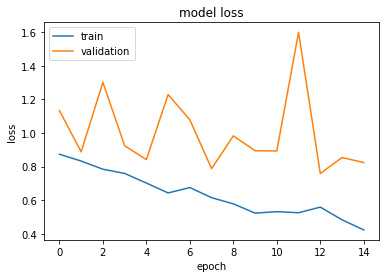

In [69]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

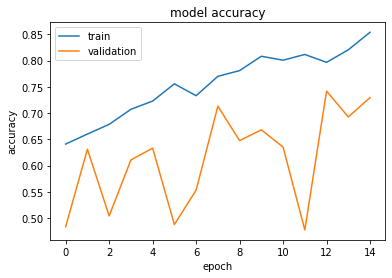

In [70]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [71]:
y_pred_2 = model_2.predict(TrainData, verbose = 1)
y_pred_bool_2 = np.argmax(y_pred_2, axis = 1)
y_pred_one_hot_2 = [str(to_categorical(i, 4)) for i in y_pred_bool_2]

46/46 [==============================] - 12s 261ms/step


In [72]:
print(classification_report(df['label'][0:len(y_pred_bool_2)], y_pred_one_hot_2))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.29      0.26       339
[0. 0. 1. 0.]       0.24      0.27      0.25       359
[0. 1. 0. 0.]       0.26      0.23      0.25       369
[1. 0. 0. 0.]       0.28      0.21      0.24       398

     accuracy                           0.25      1465
    macro avg       0.25      0.25      0.25      1465
 weighted avg       0.25      0.25      0.25      1465



In [73]:
validation_y_pred_2 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_2 = np.argmax(validation_y_pred_2, axis = 1)
validation_y_pred_one_hot_2 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_2]

 7/16 [============>.................] - ETA: 1s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 203ms/step


In [74]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_2))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.34      0.32      0.33       120
[0. 0. 1. 0.]       0.24      0.39      0.30       103
[0. 1. 0. 0.]       0.28      0.24      0.25       140
[1. 0. 0. 0.]       0.36      0.26      0.30       125

     accuracy                           0.29       488
    macro avg       0.30      0.30      0.29       488
 weighted avg       0.31      0.29      0.29       488



## Model With Momentum = 0.9

In [75]:
model_3 = models.Model(inputs = inpt, outputs = output)

In [76]:
model_3.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.9), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [77]:
history_3 = model_3.fit(TrainData, validation_data = ValidationData, epochs=15)

Epoch 1/15
 3/46 [>.............................] - ETA: 13s - loss: 0.2708 - accuracy: 0.9167

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 17s 377ms/step - loss: 1.4084 - accuracy: 0.4710 - val_loss: 1.2332 - val_accuracy: 0.4447
Epoch 2/15
46/46 [==============================] - 17s 371ms/step - loss: 1.1177 - accuracy: 0.5099 - val_loss: 1.1689 - val_accuracy: 0.4734
Epoch 3/15
46/46 [==============================] - 18s 381ms/step - loss: 0.9751 - accuracy: 0.5741 - val_loss: 1.1080 - val_accuracy: 0.5123
Epoch 4/15
46/46 [==============================] - 17s 365ms/step - loss: 0.9554 - accuracy: 0.5836 - val_loss: 1.5475 - val_accuracy: 0.4344
Epoch 5/15
46/46 [==============================] - 17s 361ms/step - loss: 0.9468 - accuracy: 0.5891 - val_loss: 1.2580 - val_accuracy: 0.4795
Epoch 6/15
46/46 [==============================] - 17s 365ms/step - loss: 0.9450 - accuracy: 0.6055 - val_loss: 1.1874 - val_accuracy: 0.5369
Epoch 7/15
46/46 [==============================] - 17s 361ms/step - loss: 0.8996 - accuracy: 0.6273 - val_loss: 1.0990 - val_accuracy: 0.5492
Epoch 8/15

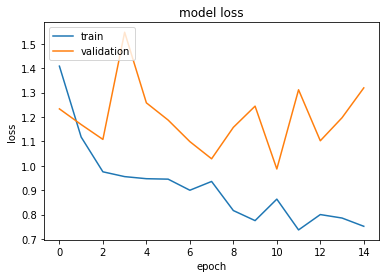

In [78]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

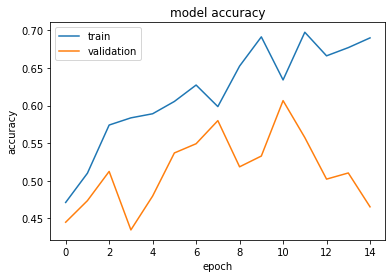

In [79]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [80]:
y_pred_3 = model_3.predict(TrainData, verbose = 1)
y_pred_bool_3 = np.argmax(y_pred_3, axis = 1)
y_pred_one_hot_3 = [str(to_categorical(i, 4)) for i in y_pred_bool_3]

46/46 [==============================] - 12s 262ms/step


In [81]:
print(classification_report(df['label'][0:len(y_pred_bool_3)], y_pred_one_hot_3))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.24      0.15      0.19       339
[0. 0. 1. 0.]       0.33      0.07      0.12       359
[0. 1. 0. 0.]       0.30      0.36      0.33       369
[1. 0. 0. 0.]       0.26      0.47      0.34       398

     accuracy                           0.27      1465
    macro avg       0.28      0.27      0.24      1465
 weighted avg       0.28      0.27      0.25      1465



In [82]:
validation_y_pred_3 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_3 = np.argmax(validation_y_pred_3, axis = 1)
validation_y_pred_one_hot_3 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_3]

 7/16 [============>.................] - ETA: 1s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 201ms/step


In [83]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_3))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.27      0.17      0.21       120
[0. 0. 1. 0.]       0.18      0.03      0.05       103
[0. 1. 0. 0.]       0.29      0.34      0.31       140
[1. 0. 0. 0.]       0.28      0.50      0.36       125

     accuracy                           0.27       488
    macro avg       0.25      0.26      0.23       488
 weighted avg       0.26      0.27      0.24       488



### NO, a large momentum (e.g. 0.9) will mean that the update is strongly influenced by the previous update, whereas a modest momentum (0.2) will mean very little influence. So increase the momentum does not always improve the result.

## Model with Adam

In [84]:
model_4 = models.Model(inputs = inpt, outputs = output)

In [85]:
model_4.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [86]:
history_4 = model_4.fit(TrainData, validation_data = ValidationData, epochs=10)

Epoch 1/10
 3/46 [>.............................] - ETA: 10s - loss: 7.0117 - accuracy: 0.2708

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 18s 382ms/step - loss: 1.7443 - accuracy: 0.4041 - val_loss: 1.3343 - val_accuracy: 0.4590
Epoch 2/10
46/46 [==============================] - 17s 365ms/step - loss: 1.2608 - accuracy: 0.4689 - val_loss: 1.0867 - val_accuracy: 0.5348
Epoch 3/10
46/46 [==============================] - 17s 369ms/step - loss: 1.0450 - accuracy: 0.5386 - val_loss: 1.0528 - val_accuracy: 0.5430
Epoch 4/10
46/46 [==============================] - 17s 366ms/step - loss: 0.9239 - accuracy: 0.6171 - val_loss: 1.0075 - val_accuracy: 0.5533
Epoch 5/10
46/46 [==============================] - 17s 369ms/step - loss: 0.9367 - accuracy: 0.6143 - val_loss: 1.0717 - val_accuracy: 0.5574
Epoch 6/10
46/46 [==============================] - 17s 378ms/step - loss: 0.7805 - accuracy: 0.6737 - val_loss: 0.9418 - val_accuracy: 0.6086
Epoch 7/10
46/46 [==============================] - 17s 374ms/step - loss: 0.8106 - accuracy: 0.6778 - val_loss: 1.0000 - val_accuracy: 0.5963
Epoch 8/10

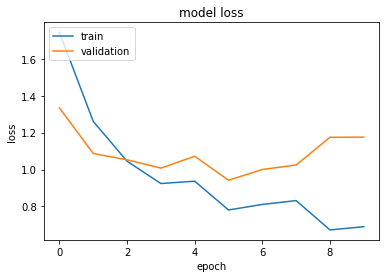

In [87]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

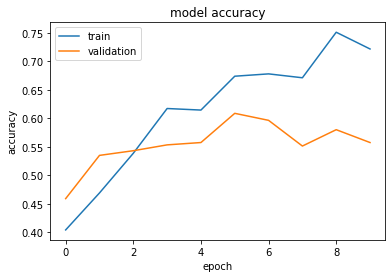

In [88]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [89]:
y_pred_4 = model_4.predict(TrainData, verbose = 1)
y_pred_bool_4 = np.argmax(y_pred_4, axis = 1)
y_pred_one_hot_4 = [str(to_categorical(i, 4)) for i in y_pred_bool_4]

46/46 [==============================] - 12s 268ms/step


In [90]:
print(classification_report(df['label'][0:len(y_pred_bool_4)], y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.26      0.25       339
[0. 0. 1. 0.]       0.26      0.33      0.29       359
[0. 1. 0. 0.]       0.27      0.35      0.31       369
[1. 0. 0. 0.]       0.27      0.10      0.15       398

     accuracy                           0.26      1465
    macro avg       0.26      0.26      0.25      1465
 weighted avg       0.26      0.26      0.25      1465



In [91]:
validation_y_pred_4 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_4 = np.argmax(validation_y_pred_4, axis = 1)
validation_y_pred_one_hot_4 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_4]

 7/16 [============>.................] - ETA: 1s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 204ms/step


In [92]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.32      0.26      0.29       120
[0. 0. 1. 0.]       0.22      0.36      0.27       103
[0. 1. 0. 0.]       0.28      0.39      0.33       140
[1. 0. 0. 0.]       0.44      0.12      0.19       125

     accuracy                           0.28       488
    macro avg       0.32      0.28      0.27       488
 weighted avg       0.32      0.28      0.27       488



### Compare Adam and SGD:

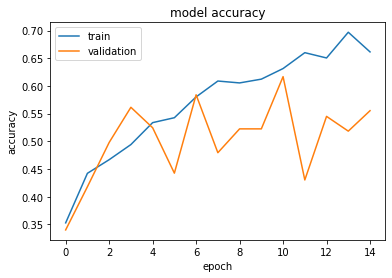

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

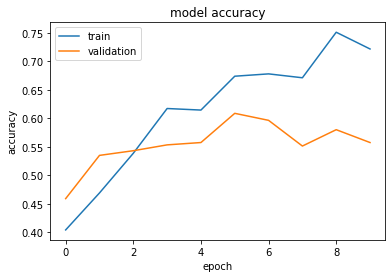

In [94]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [95]:
print(classification_report(df['label'][0:len(y_pred_bool)], y_pred_one_hot))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.27      0.08      0.13       339
[0. 0. 1. 0.]       0.24      0.55      0.34       359
[0. 1. 0. 0.]       0.23      0.11      0.15       369
[1. 0. 0. 0.]       0.27      0.25      0.26       398

     accuracy                           0.25      1465
    macro avg       0.26      0.25      0.22      1465
 weighted avg       0.26      0.25      0.22      1465



In [96]:
print(classification_report(df['label'][0:len(y_pred_bool_4)], y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.26      0.25       339
[0. 0. 1. 0.]       0.26      0.33      0.29       359
[0. 1. 0. 0.]       0.27      0.35      0.31       369
[1. 0. 0. 0.]       0.27      0.10      0.15       398

     accuracy                           0.26      1465
    macro avg       0.26      0.26      0.25      1465
 weighted avg       0.26      0.26      0.25      1465



In [97]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.33      0.07      0.11       120
[0. 0. 1. 0.]       0.20      0.59      0.30       103
[0. 1. 0. 0.]       0.30      0.13      0.18       140
[1. 0. 0. 0.]       0.32      0.27      0.29       125

     accuracy                           0.25       488
    macro avg       0.29      0.26      0.22       488
 weighted avg       0.29      0.25      0.22       488



In [98]:
print(classification_report(df['label'][len(y_pred_bool_4):], validation_y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.32      0.26      0.29       120
[0. 0. 1. 0.]       0.22      0.36      0.27       103
[0. 1. 0. 0.]       0.28      0.39      0.33       140
[1. 0. 0. 0.]       0.44      0.12      0.19       125

     accuracy                           0.28       488
    macro avg       0.32      0.28      0.27       488
 weighted avg       0.32      0.28      0.27       488



### Adam learn faster so 10 epoch is enough and has better accuracy and better result than SGD. (Especially on Train Data)

## Section 2: Epoch Effect

In [99]:
model_5 = models.Model(inputs = inpt, outputs = output)

In [100]:
model_5.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [101]:
history_5 = model_5.fit(TrainData, validation_data = ValidationData, epochs=20)

Epoch 1/20
 1/46 [..............................] - ETA: 26s - loss: 0.8725 - accuracy: 0.6875

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 18s 397ms/step - loss: 1.0266 - accuracy: 0.6266 - val_loss: 1.1167 - val_accuracy: 0.5451
Epoch 2/20
46/46 [==============================] - 18s 392ms/step - loss: 0.6886 - accuracy: 0.7331 - val_loss: 0.9228 - val_accuracy: 0.6537
Epoch 3/20
46/46 [==============================] - 18s 397ms/step - loss: 0.5515 - accuracy: 0.7850 - val_loss: 1.1316 - val_accuracy: 0.5820
Epoch 4/20
46/46 [==============================] - 18s 394ms/step - loss: 0.5785 - accuracy: 0.7741 - val_loss: 0.8841 - val_accuracy: 0.6844
Epoch 5/20
46/46 [==============================] - 17s 374ms/step - loss: 0.5434 - accuracy: 0.7939 - val_loss: 0.8894 - val_accuracy: 0.7131
Epoch 6/20
46/46 [==============================] - 17s 371ms/step - loss: 0.4126 - accuracy: 0.8410 - val_loss: 0.9919 - val_accuracy: 0.7049
Epoch 7/20
46/46 [==============================] - 17s 365ms/step - loss: 0.5296 - accuracy: 0.7925 - val_loss: 1.3199 - val_accuracy: 0.5512
Epoch 8/20

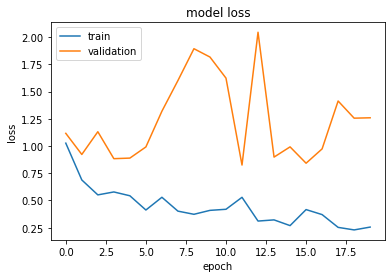

In [102]:
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

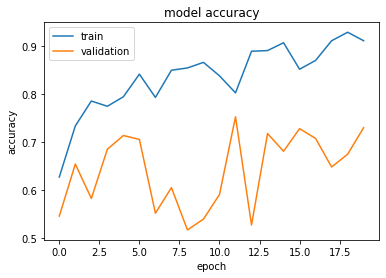

In [103]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [104]:
y_pred_5 = model_5.predict(TrainData, verbose = 1)
y_pred_bool_5 = np.argmax(y_pred_5, axis = 1)
y_pred_one_hot_5 = [str(to_categorical(i, 4)) for i in y_pred_bool_5]

46/46 [==============================] - 13s 282ms/step


In [105]:
print(classification_report(df['label'][0:len(y_pred_bool_5)], y_pred_one_hot_5))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.22      0.22      0.22       339
[0. 0. 1. 0.]       0.24      0.25      0.25       359
[0. 1. 0. 0.]       0.28      0.32      0.30       369
[1. 0. 0. 0.]       0.28      0.24      0.26       398

     accuracy                           0.26      1465
    macro avg       0.26      0.26      0.26      1465
 weighted avg       0.26      0.26      0.26      1465



In [106]:
validation_y_pred_5 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_5 = np.argmax(validation_y_pred_5, axis = 1)
validation_y_pred_one_hot_5 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_5]

 7/16 [============>.................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 207ms/step


In [107]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_5))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.31      0.25      0.28       120
[0. 0. 1. 0.]       0.21      0.26      0.23       103
[0. 1. 0. 0.]       0.28      0.35      0.31       140
[1. 0. 0. 0.]       0.33      0.23      0.27       125

     accuracy                           0.28       488
    macro avg       0.28      0.27      0.27       488
 weighted avg       0.29      0.28      0.28       488



### 1: Because one epoch is not enough for learn all weights with proper values because they set randomly at the first time and we need visit Train data more than one time to learn enough.
### If Train Data is big enough, one epoch may be enough.

### 2 : Overfitting

In [108]:
model_6 = models.Model(inputs = inpt, outputs = output)

In [109]:
model_6.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [110]:
history_6 = model_6.fit(TrainData, validation_data = ValidationData, epochs=50)

Epoch 1/50
 5/46 [==>...........................] - ETA: 12s - loss: 1.8425 - accuracy: 0.7375

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 19s 405ms/step - loss: 0.5572 - accuracy: 0.8457 - val_loss: 0.9106 - val_accuracy: 0.7684
Epoch 2/50
46/46 [==============================] - 18s 389ms/step - loss: 0.2257 - accuracy: 0.9229 - val_loss: 1.1586 - val_accuracy: 0.7213
Epoch 3/50
46/46 [==============================] - 17s 382ms/step - loss: 0.3079 - accuracy: 0.8956 - val_loss: 1.0023 - val_accuracy: 0.7541
Epoch 4/50
46/46 [==============================] - 18s 385ms/step - loss: 0.3365 - accuracy: 0.8962 - val_loss: 1.1168 - val_accuracy: 0.7111
Epoch 5/50
46/46 [==============================] - 17s 379ms/step - loss: 0.2155 - accuracy: 0.9304 - val_loss: 0.9796 - val_accuracy: 0.7582
Epoch 6/50
46/46 [==============================] - 17s 373ms/step - loss: 0.0993 - accuracy: 0.9618 - val_loss: 1.0908 - val_accuracy: 0.7643
Epoch 7/50
46/46 [==============================] - 17s 368ms/step - loss: 0.1523 - accuracy: 0.9468 - val_loss: 1.0207 - val_accuracy: 0.7398
Epoch 8/50

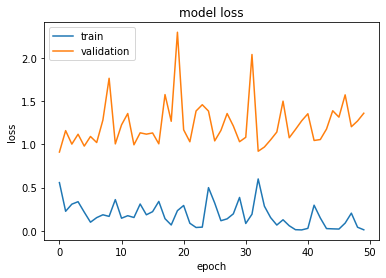

In [111]:
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

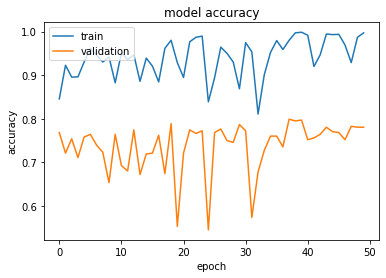

In [112]:
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [113]:
y_pred_6 = model_6.predict(TrainData, verbose = 1)
y_pred_bool_6 = np.argmax(y_pred_6, axis = 1)
y_pred_one_hot_6 = [str(to_categorical(i, 4)) for i in y_pred_bool_6]

46/46 [==============================] - 12s 267ms/step


In [114]:
print(classification_report(df['label'][0:len(y_pred_bool_6)], y_pred_one_hot_6))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.21      0.25      0.23       339
[0. 0. 1. 0.]       0.24      0.25      0.24       359
[0. 1. 0. 0.]       0.25      0.23      0.24       369
[1. 0. 0. 0.]       0.27      0.23      0.25       398

     accuracy                           0.24      1465
    macro avg       0.24      0.24      0.24      1465
 weighted avg       0.24      0.24      0.24      1465



In [115]:
validation_y_pred_6 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_6 = np.argmax(validation_y_pred_6, axis = 1)
validation_y_pred_one_hot_6 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_6]

 7/16 [============>.................] - ETA: 1s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 215ms/step


In [116]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_6))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.28      0.32      0.30       120
[0. 0. 1. 0.]       0.22      0.27      0.24       103
[0. 1. 0. 0.]       0.28      0.25      0.27       140
[1. 0. 0. 0.]       0.32      0.26      0.28       125

     accuracy                           0.27       488
    macro avg       0.27      0.27      0.27       488
 weighted avg       0.28      0.27      0.27       488



### when model overfitted, then accuracy on validation data will be decreased.

### 3: Early Stopping in Keras

In [117]:
es = callbacks.EarlyStopping(monitor='accuracy', mode = 'max', verbose = 1)

In [118]:
model_7 = models.Model(inputs = inpt, outputs = output)

In [119]:
model_7.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [120]:
history_7 = model_7.fit(TrainData, validation_data = ValidationData, epochs=100, callbacks = [es])

Epoch 1/100
 1/46 [..............................] - ETA: 22s - loss: 4.5767e-04 - accuracy: 1.0000

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 18s 395ms/step - loss: 0.2934 - accuracy: 0.9195 - val_loss: 1.4317 - val_accuracy: 0.7275
Epoch 2/100
46/46 [==============================] - 17s 384ms/step - loss: 0.4245 - accuracy: 0.8778 - val_loss: 1.2976 - val_accuracy: 0.7336
Epoch 00002: early stopping


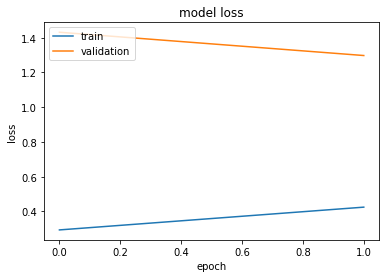

In [121]:
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

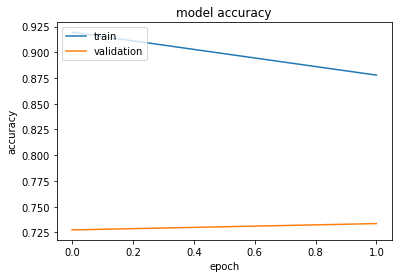

In [122]:
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [123]:
y_pred_7 = model_7.predict(TrainData, verbose = 1)
y_pred_bool_7 = np.argmax(y_pred_7, axis = 1)
y_pred_one_hot_7 = [str(to_categorical(i, 4)) for i in y_pred_bool_7]

46/46 [==============================] - 12s 269ms/step


In [124]:
print(classification_report(df['label'][0:len(y_pred_bool_7)], y_pred_one_hot_7))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.22      0.24      0.23       339
[0. 0. 1. 0.]       0.23      0.28      0.25       359
[0. 1. 0. 0.]       0.25      0.22      0.23       369
[1. 0. 0. 0.]       0.27      0.22      0.25       398

     accuracy                           0.24      1465
    macro avg       0.24      0.24      0.24      1465
 weighted avg       0.24      0.24      0.24      1465



In [125]:
validation_y_pred_7 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_7 = np.argmax(validation_y_pred_7, axis = 1)
validation_y_pred_one_hot_7 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_7]

 7/16 [============>.................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 219ms/step


In [126]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_7))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.30      0.28      0.29       120
[0. 0. 1. 0.]       0.21      0.37      0.27       103
[0. 1. 0. 0.]       0.28      0.21      0.24       140
[1. 0. 0. 0.]       0.36      0.26      0.31       125

     accuracy                           0.27       488
    macro avg       0.29      0.28      0.28       488
 weighted avg       0.29      0.27      0.28       488



### 4: NO, It cause overfitting.
### We can solve that with:  1.Reduce overfitting by training the network on more examples.  2. Reduce overfitting by changing the complexity of the network.


## Section 3: Loss Function Effect

In [127]:
model_8 = models.Model(inputs = inpt, outputs = output)

In [128]:
model_8.compile(optimizer = optimizers.Adam(), loss = "mean_squared_error", metrics = ["accuracy"]) 

In [129]:
history_8 = model_8.fit(TrainData, validation_data = ValidationData, epochs=10)

Epoch 1/10
 7/46 [===>..........................] - ETA: 11s - loss: 0.0448 - accuracy: 0.8795

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 18s 391ms/step - loss: 0.0262 - accuracy: 0.9324 - val_loss: 0.0939 - val_accuracy: 0.7705
Epoch 2/10
46/46 [==============================] - 17s 369ms/step - loss: 0.0039 - accuracy: 0.9918 - val_loss: 0.0961 - val_accuracy: 0.7705
Epoch 3/10
46/46 [==============================] - 17s 371ms/step - loss: 0.0078 - accuracy: 0.9802 - val_loss: 0.0966 - val_accuracy: 0.7725
Epoch 4/10
46/46 [==============================] - 18s 383ms/step - loss: 0.0225 - accuracy: 0.9433 - val_loss: 0.2080 - val_accuracy: 0.5430
Epoch 5/10
46/46 [==============================] - 18s 387ms/step - loss: 0.0646 - accuracy: 0.8410 - val_loss: 0.1569 - val_accuracy: 0.6332
Epoch 6/10
46/46 [==============================] - 17s 370ms/step - loss: 0.0189 - accuracy: 0.9509 - val_loss: 0.0906 - val_accuracy: 0.7951
Epoch 7/10
46/46 [==============================] - 18s 386ms/step - loss: 0.0041 - accuracy: 0.9904 - val_loss: 0.1106 - val_accuracy: 0.7377
Epoch 8/10

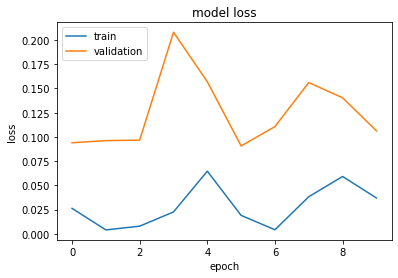

In [130]:
plt.plot(history_8.history['loss'])
plt.plot(history_8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

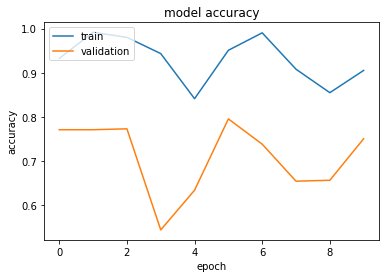

In [131]:
plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [132]:
y_pred_8 = model_8.predict(TrainData, verbose = 1)
y_pred_bool_8 = np.argmax(y_pred_8, axis = 1)
y_pred_one_hot_8 = [str(to_categorical(i, 4)) for i in y_pred_bool_8]

46/46 [==============================] - 13s 288ms/step


In [133]:
print(classification_report(df['label'][0:len(y_pred_bool_8)], y_pred_one_hot_8))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.22      0.24      0.23       339
[0. 0. 1. 0.]       0.24      0.25      0.24       359
[0. 1. 0. 0.]       0.27      0.27      0.27       369
[1. 0. 0. 0.]       0.26      0.22      0.24       398

     accuracy                           0.25      1465
    macro avg       0.25      0.25      0.24      1465
 weighted avg       0.25      0.25      0.25      1465



In [134]:
validation_y_pred_8 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_8 = np.argmax(validation_y_pred_8, axis = 1)
validation_y_pred_one_hot_8 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_8]

 7/16 [============>.................] - ETA: 1s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 214ms/step


In [135]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_8))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.29      0.27      0.28       120
[0. 0. 1. 0.]       0.21      0.25      0.23       103
[0. 1. 0. 0.]       0.28      0.30      0.29       140
[1. 0. 0. 0.]       0.36      0.30      0.33       125

     accuracy                           0.28       488
    macro avg       0.29      0.28      0.28       488
 weighted avg       0.29      0.28      0.28       488



### Compare MSE with Categorical Cross Entropy:

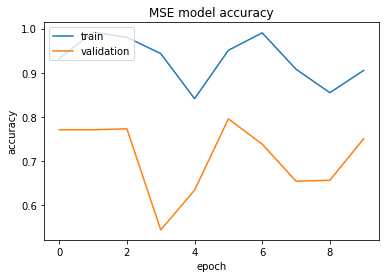

In [136]:
plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('MSE model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

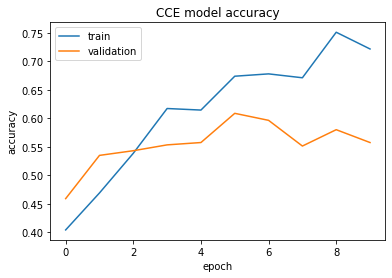

In [137]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('CCE model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### MSE:

In [138]:
print(classification_report(df['label'][0:len(y_pred_bool_8)], y_pred_one_hot_8))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.22      0.24      0.23       339
[0. 0. 1. 0.]       0.24      0.25      0.24       359
[0. 1. 0. 0.]       0.27      0.27      0.27       369
[1. 0. 0. 0.]       0.26      0.22      0.24       398

     accuracy                           0.25      1465
    macro avg       0.25      0.25      0.24      1465
 weighted avg       0.25      0.25      0.25      1465



### Categorical Cross Entropy:

In [139]:
print(classification_report(df['label'][0:len(y_pred_bool_4)], y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.26      0.25       339
[0. 0. 1. 0.]       0.26      0.33      0.29       359
[0. 1. 0. 0.]       0.27      0.35      0.31       369
[1. 0. 0. 0.]       0.27      0.10      0.15       398

     accuracy                           0.26      1465
    macro avg       0.26      0.26      0.25      1465
 weighted avg       0.26      0.26      0.25      1465



### MSE:

In [140]:
print(classification_report(df['label'][len(y_pred_bool_8):], validation_y_pred_one_hot_8))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.29      0.27      0.28       120
[0. 0. 1. 0.]       0.21      0.25      0.23       103
[0. 1. 0. 0.]       0.28      0.30      0.29       140
[1. 0. 0. 0.]       0.36      0.30      0.33       125

     accuracy                           0.28       488
    macro avg       0.29      0.28      0.28       488
 weighted avg       0.29      0.28      0.28       488



### Categorical Cross Entropy:

In [141]:
print(classification_report(df['label'][len(y_pred_bool_4):], validation_y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.32      0.26      0.29       120
[0. 0. 1. 0.]       0.22      0.36      0.27       103
[0. 1. 0. 0.]       0.28      0.39      0.33       140
[1. 0. 0. 0.]       0.44      0.12      0.19       125

     accuracy                           0.28       488
    macro avg       0.32      0.28      0.27       488
 weighted avg       0.32      0.28      0.27       488



### The result with categorical cross entropy is better than MSE.

### 2:
### First, using MSE means that we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve). In Bayesian terms this means we assume a Gaussian prior. While in reality, a dataset that can be classified into two categories (i.e binary) is not from a normal distribution but a Bernoulli distribution.
### Secondly, the MSE function is non-convex for binary classification. In simple terms, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range(-∞, ∞), while binary classification models output probabilities in range(0,1) through the sigmoid/logistic function. 
### MSE is a good choice for a Cost function when we are doing Linear Regression.

## Section 4: Regularization Effect

## 1 : L2

In [142]:
input2 = layers.Input(shape=(128, 128, 1))

output2 = layers.Flatten()(input2)
output2 = layers.Dense(1024, activation = "relu", kernel_regularizer = regularizers.l2(l2=0.0001))(output2)
output2 = layers.Dense(512, activation = "relu", kernel_regularizer = regularizers.l2(l2=0.0001))(output2)
output2 = layers.Dense(256, activation = "relu", kernel_regularizer = regularizers.l2(l2=0.0001))(output2)
output2 = layers.Dense(4, activation = "softmax", kernel_regularizer = regularizers.l2(l2=0.0001))(output2)

In [143]:
model_9 = models.Model(inputs = input2, outputs = output2)

In [144]:
model_9.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [145]:
history_9 = model_9.fit(TrainData, validation_data = ValidationData, epochs=20)

Epoch 1/20
 2/46 [>.............................] - ETA: 20s - loss: 11.7586 - accuracy: 0.3906

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 21s 444ms/step - loss: 4.7620 - accuracy: 0.3235 - val_loss: 1.6069 - val_accuracy: 0.4447
Epoch 2/20
46/46 [==============================] - 19s 410ms/step - loss: 1.5247 - accuracy: 0.4212 - val_loss: 1.4898 - val_accuracy: 0.3934
Epoch 3/20
46/46 [==============================] - 20s 425ms/step - loss: 1.4562 - accuracy: 0.4614 - val_loss: 1.3671 - val_accuracy: 0.4795
Epoch 4/20
46/46 [==============================] - 20s 432ms/step - loss: 1.3585 - accuracy: 0.4846 - val_loss: 1.3011 - val_accuracy: 0.5266
Epoch 5/20
46/46 [==============================] - 21s 453ms/step - loss: 1.2690 - accuracy: 0.5188 - val_loss: 1.3352 - val_accuracy: 0.4570
Epoch 6/20
46/46 [==============================] - 19s 423ms/step - loss: 1.2465 - accuracy: 0.5188 - val_loss: 1.3471 - val_accuracy: 0.4939
Epoch 7/20
46/46 [==============================] - 20s 435ms/step - loss: 1.2015 - accuracy: 0.5693 - val_loss: 1.3220 - val_accuracy: 0.4857
Epoch 8/20

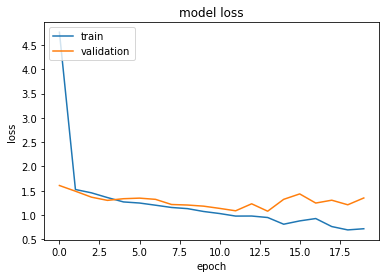

In [146]:
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

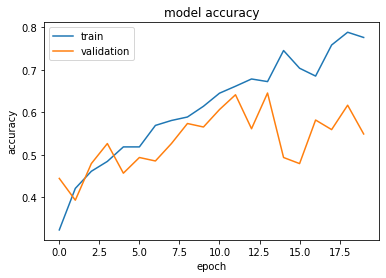

In [147]:
plt.plot(history_9.history['accuracy'])
plt.plot(history_9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [148]:
y_pred_9 = model_9.predict(TrainData, verbose = 1)
y_pred_bool_9 = np.argmax(y_pred_9, axis = 1)
y_pred_one_hot_9 = [str(to_categorical(i, 4)) for i in y_pred_bool_9]

46/46 [==============================] - 12s 261ms/step


In [149]:
print(classification_report(df['label'][0:len(y_pred_bool_9)], y_pred_one_hot_9))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.19      0.24      0.21       339
[0. 0. 1. 0.]       0.27      0.12      0.16       359
[0. 1. 0. 0.]       0.24      0.20      0.22       369
[1. 0. 0. 0.]       0.26      0.40      0.32       398

     accuracy                           0.24      1465
    macro avg       0.24      0.24      0.23      1465
 weighted avg       0.24      0.24      0.23      1465



In [150]:
validation_y_pred_9 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_9 = np.argmax(validation_y_pred_9, axis = 1)
validation_y_pred_one_hot_9 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_9]

 7/16 [============>.................] - ETA: 1s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 202ms/step


In [151]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_9))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.29      0.27      0.28       120
[0. 0. 1. 0.]       0.21      0.25      0.23       103
[0. 1. 0. 0.]       0.28      0.30      0.29       140
[1. 0. 0. 0.]       0.36      0.30      0.33       125

     accuracy                           0.28       488
    macro avg       0.29      0.28      0.28       488
 weighted avg       0.29      0.28      0.28       488



### Regularization is a technique for preventing over-fitting by penalizing a model for having large weights. So when we use L2 regularization for each layer, less overfitting occurs.

## 2: Dropout

In [152]:
input3 = layers.Input(shape=(128, 128, 1))

output3 = layers.Flatten()(input3)
output3 = layers.Dense(1024, activation = "relu")(output3)
output3 = layers.Dropout(0.1)(output3)
output3 = layers.Dense(512, activation = "relu")(output3)
output3 = layers.Dropout(0.1)(output3)
output3 = layers.Dense(256, activation = "relu")(output3)
output3 = layers.Dropout(0.1)(output3)
output3 = layers.Dense(4, activation = "softmax")(output3)

In [153]:
model_10 = models.Model(inputs = input3, outputs = output3)

In [154]:
model_10.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [155]:
model_10.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0         
                                                                 
 dense_12 (Dense)            (None, 1024)              16778240  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               131

In [156]:
history_10 = model_10.fit(TrainData, validation_data = ValidationData, epochs=20)

Epoch 1/20


/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 19s 415ms/step - loss: 4.3172 - accuracy: 0.2737 - val_loss: 1.3527 - val_accuracy: 0.3033
Epoch 2/20
46/46 [==============================] - 17s 373ms/step - loss: 1.3756 - accuracy: 0.3495 - val_loss: 1.2650 - val_accuracy: 0.3750
Epoch 3/20
46/46 [==============================] - 18s 394ms/step - loss: 1.2717 - accuracy: 0.4068 - val_loss: 1.1985 - val_accuracy: 0.4385
Epoch 4/20
46/46 [==============================] - 17s 373ms/step - loss: 1.2282 - accuracy: 0.4396 - val_loss: 1.1849 - val_accuracy: 0.4119
Epoch 5/20
46/46 [==============================] - 17s 367ms/step - loss: 1.2224 - accuracy: 0.4259 - val_loss: 1.1463 - val_accuracy: 0.4590
Epoch 6/20
46/46 [==============================] - 17s 367ms/step - loss: 1.1655 - accuracy: 0.4505 - val_loss: 1.1590 - val_accuracy: 0.4385
Epoch 7/20
46/46 [==============================] - 17s 368ms/step - loss: 1.1425 - accuracy: 0.4696 - val_loss: 1.1137 - val_accuracy: 0.5143
Epoch 8/20

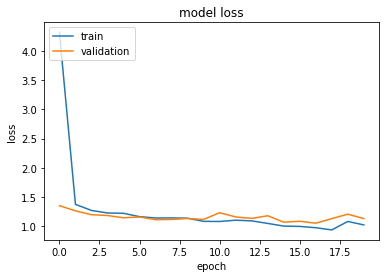

In [157]:
plt.plot(history_10.history['loss'])
plt.plot(history_10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

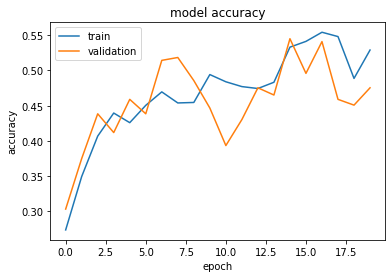

In [158]:
plt.plot(history_10.history['accuracy'])
plt.plot(history_10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [159]:
y_pred_10 = model_10.predict(TrainData, verbose = 1)
y_pred_bool_10 = np.argmax(y_pred_10, axis = 1)
y_pred_one_hot_10 = [str(to_categorical(i, 4)) for i in y_pred_bool_10]

46/46 [==============================] - 12s 271ms/step


In [160]:
print(classification_report(df['label'][0:len(y_pred_bool_10)], y_pred_one_hot_10))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.24      0.12      0.16       339
[0. 0. 1. 0.]       0.26      0.05      0.09       359
[0. 1. 0. 0.]       0.27      0.63      0.37       369
[1. 0. 0. 0.]       0.27      0.23      0.25       398

     accuracy                           0.26      1465
    macro avg       0.26      0.26      0.22      1465
 weighted avg       0.26      0.26      0.22      1465



In [161]:
validation_y_pred_10 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_10 = np.argmax(validation_y_pred_10, axis = 1)
validation_y_pred_one_hot_10 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_10]

 7/16 [============>.................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 224ms/step


In [162]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_10))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.29      0.27      0.28       120
[0. 0. 1. 0.]       0.21      0.25      0.23       103
[0. 1. 0. 0.]       0.28      0.30      0.29       140
[1. 0. 0. 0.]       0.36      0.30      0.33       125

     accuracy                           0.28       488
    macro avg       0.29      0.28      0.28       488
 weighted avg       0.29      0.28      0.28       488



### Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.
### The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.
### So, when we use Dropout Regularization for each layer, less overfitting occurs.
refrence : https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

# Test Best Model with the Test Dataset:

## Load Test Data:

In [163]:
test_path = "../dataset/test"

In [164]:
img_path = []
labels = []
for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for img in os.listdir(folder_path):
        img_path.append(os.path.join(folder_path, img))
        labels.append(folder)

In [165]:
df_2 = pd.DataFrame({
    "image" : img_path,
    "label" : labels
})

In [166]:
df_2.count()

image    839
label    839
dtype: int64

In [167]:
df_2['label'].value_counts().count()

4

In [168]:
df_2['label'].value_counts()

bald_eagle    225
racoon        219
elk           198
raven         197
Name: label, dtype: int64

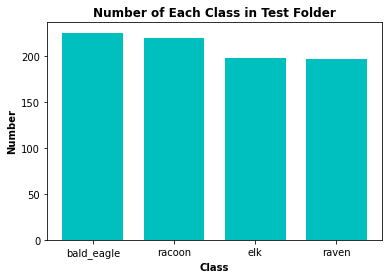

In [169]:
plt.bar(
    df_2['label'].value_counts().keys(),
    df_2['label'].value_counts().values,
    color='c',
    width=.75
)
plt.xlabel("Class", fontweight ='bold')
plt.ylabel("Number", fontweight ='bold')
plt.title("Number of Each Class in Test Folder", fontweight ='bold')
plt.show()

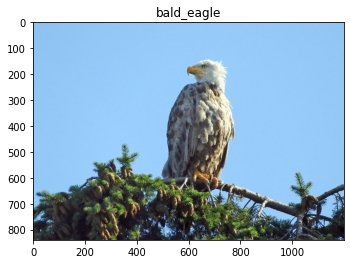

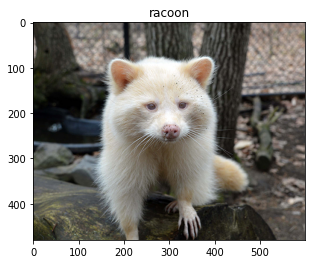

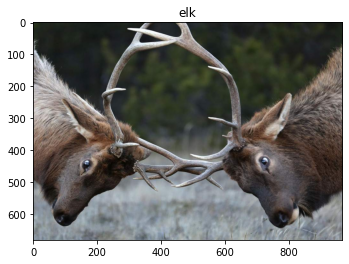

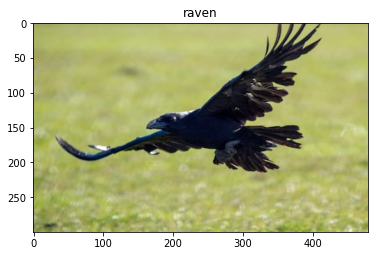

In [170]:
for name in df_2['label'].value_counts().keys():
    rand_num = random.randint(0, len(df_2))
    while df_2['label'][rand_num] != name:
        rand_num = random.randint(0, len(df_2))
    img = load_img(df_2['image'][rand_num])
    title = df_2['label'][rand_num]
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [171]:
for i in range(len(df_2)):
    df_2['label'][i] = classes_labels[df_2['label'][i]]

In [172]:
df_2['label']

0      0
1      0
2      0
3      0
4      0
      ..
834    1
835    1
836    1
837    1
838    1
Name: label, Length: 839, dtype: object

In [173]:
one_hot = [str(to_categorical(i, df_2['label'].value_counts().count())) for i in df_2['label']]

In [174]:
df_2['label'] = one_hot

In [175]:
df_2['label']

0      [1. 0. 0. 0.]
1      [1. 0. 0. 0.]
2      [1. 0. 0. 0.]
3      [1. 0. 0. 0.]
4      [1. 0. 0. 0.]
           ...      
834    [0. 1. 0. 0.]
835    [0. 1. 0. 0.]
836    [0. 1. 0. 0.]
837    [0. 1. 0. 0.]
838    [0. 1. 0. 0.]
Name: label, Length: 839, dtype: object

### As seen above, labels are one hot encoded based on Training data Classes encodes.

In [176]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255.0,
)

In [177]:
TestData = dataGenerator.flow_from_dataframe(
    dataframe = df_2,
    x_col = 'image',
    y_col = 'label',
    target_size = (128, 128),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = False,
    validate_filenames = False
)   

Found 839 non-validated image filenames belonging to 4 classes.


## Predict with Best Model:

### According to the above results, model_10 (model with Dropout layer and 20 epochs) is the best.

In [216]:
bool_to_name = {v: k for k, v in classes_labels.items()}

In [217]:
y_pred_test = model_10.predict(TestData, verbose = 1)
y_pred_bool_test = np.argmax(y_pred_test, axis = 1)
y_pred_one_hot_test = [str(to_categorical(i, 4)) for i in y_pred_bool_test]
y_pred_name_test = [bool_to_name[i] for i in y_pred_bool_test]

 2/27 [=>............................] - ETA: 5s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 [==============================] - 6s 242ms/step


In [218]:
print(classification_report(df_2['label'], y_pred_one_hot_test))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.15      0.09      0.11       197
[0. 0. 1. 0.]       0.02      0.01      0.01       198
[0. 1. 0. 0.]       0.29      0.63      0.39       219
[1. 0. 0. 0.]       0.25      0.21      0.23       225

     accuracy                           0.24       839
    macro avg       0.18      0.23      0.19       839
 weighted avg       0.18      0.24      0.19       839



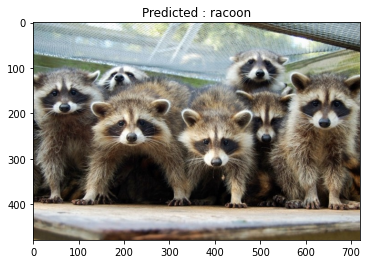

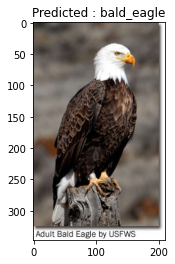

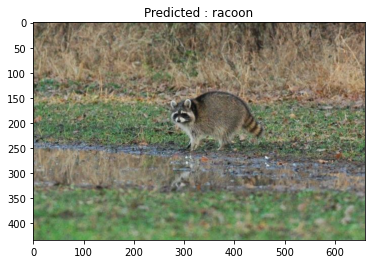

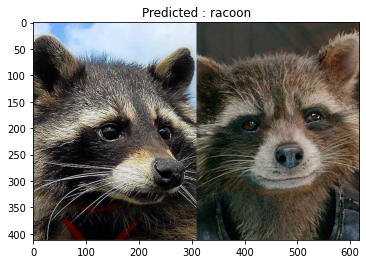

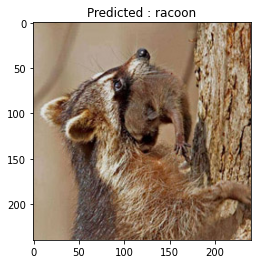

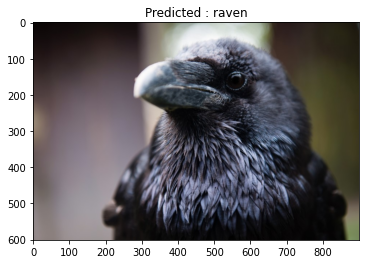

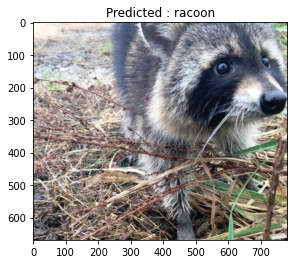

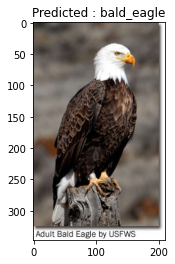

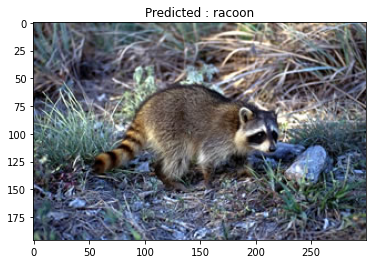

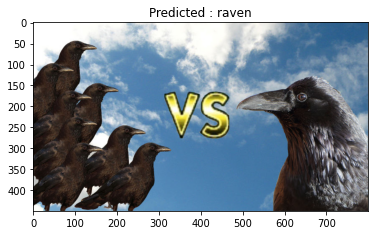

In [221]:
for i in range(0, 10):
    rand_num = random.randint(0, len(df_2))
    while df_2['label'][rand_num] != y_pred_one_hot_test[rand_num]:
        rand_num = random.randint(0, len(df_2))
    img = load_img(df_2['image'][rand_num])
    title = "Predicted : " + y_pred_name_test[rand_num]
    plt.imshow(img)
    plt.title(title)
    plt.show()       

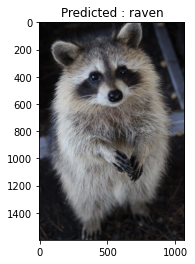

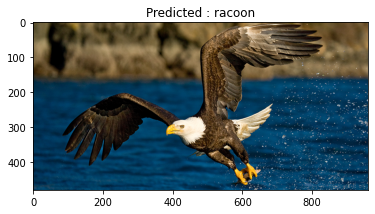

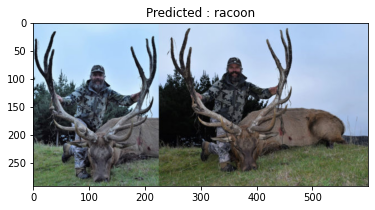

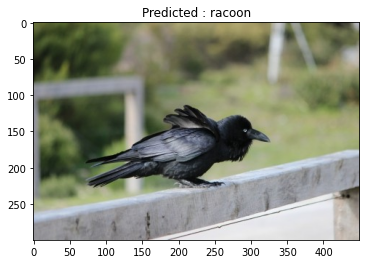

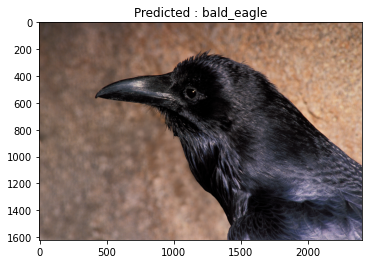

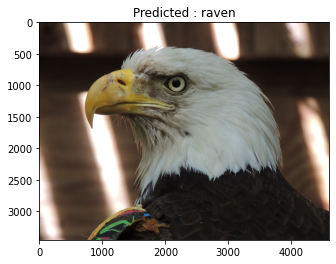

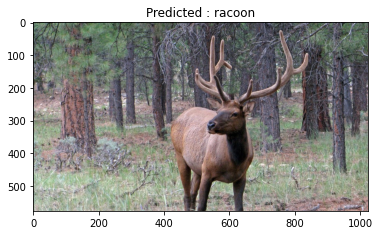

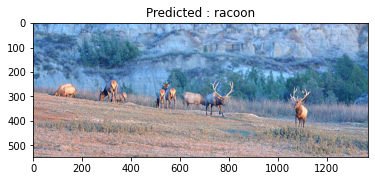

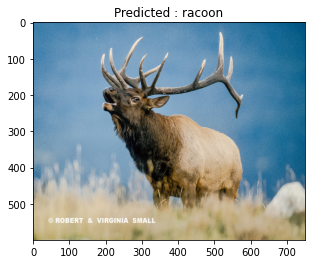

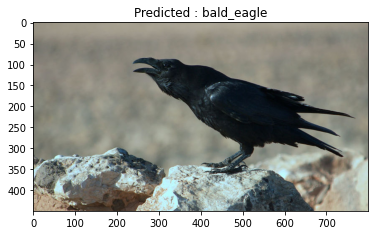

In [220]:
for i in range(0, 10):
    rand_num = random.randint(0, len(df_2))
    while df_2['label'][rand_num] == y_pred_one_hot_test[rand_num]:
        rand_num = random.randint(0, len(df_2))
    img = load_img(df_2['image'][rand_num])
    title = "Predicted : " + y_pred_name_test[rand_num]
    plt.imshow(img)
    plt.title(title)
    plt.show()    

### Similarities between animals like Bald Eagle and Raven may lead to misdiagnosis.

### An other case may be overfitting in model.

### The other case may be Similarities in background of images and Nueral Net work learn background features instead of animals.